In [6]:
from unittest.mock import inplace

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('DATA TASK - 1/Dataset.csv')

In [8]:
df

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,2,3.0,services,other,course,...,1,5,4.0,10,11.0,10,19.0,3.0,2.0,no
645,MS,F,U,LE3,T,3,1.0,teacher,services,course,...,1,1,NaN,15,15.0,16,18.0,2.0,1.0,no
646,MS,F,U,GT3,T,1,1.0,other,other,course,...,1,5,6.0,11,12.0,9,18.0,NaN,1.0,no
647,MS,M,U,LE3,T,3,1.0,services,services,course,...,3,2,6.0,10,10.0,10,NaN,1.0,4.0,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

In [10]:
fam_counts = df['famsize'].value_counts()

In [11]:
fam_counts

famsize
GT3    424
LE3    175
Name: count, dtype: int64

In [12]:
# since the 2 values are quite far thus we can take the mode and fill at null places.
df['famsize']=df['famsize'].fillna('GT3')
df['famsize'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: famsize
Non-Null Count  Dtype 
--------------  ----- 
649 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB


In [13]:
fedu_counts = df['Fedu'].value_counts()
fedu_counts

Fedu
2.0    182
1.0    159
4.0    117
3.0    112
0.0      6
Name: count, dtype: int64

In [14]:
# In this data set we would prefer median over mean as we don’t want to be skewed by outliers.
med_fedu = df['Fedu'].median()
df['Fedu']=df['Fedu'].fillna(med_fedu)
df['Fedu'].info()
df['Fedu'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: Fedu
Non-Null Count  Dtype  
--------------  -----  
649 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


Fedu
2.0    255
1.0    159
4.0    117
3.0    112
0.0      6
Name: count, dtype: int64

In [15]:
# Similarly now we will do the same process for traveltime, higher, freetime, absences, G2, Feature_1, Feature_2, Feature_3.
traveltime_counts = df['traveltime'].value_counts()
traveltime_counts

traveltime
1.0    320
2.0    195
3.0     47
4.0     14
Name: count, dtype: int64

In [16]:
# Again median is favourable. In this case we can see that median = mode.
med_traveltime = df['traveltime'].median()
df['traveltime']=df['traveltime'].fillna(med_traveltime)
df['traveltime'].info()
df['traveltime'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: traveltime
Non-Null Count  Dtype  
--------------  -----  
649 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


traveltime
1.0    393
2.0    195
3.0     47
4.0     14
Name: count, dtype: int64

In [17]:
higher_counts = df['higher'].value_counts()
higher_counts

higher
yes    509
no      64
Name: count, dtype: int64

In [18]:
# Since max students like to pursue higher education thus we replace na with YES.
df['higher']=df['higher'].fillna('yes')
df['higher'].info()
df['higher'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: higher
Non-Null Count  Dtype 
--------------  ----- 
649 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB


higher
yes    585
no      64
Name: count, dtype: int64

In [19]:
freetime_counts = df['freetime'].value_counts()
freetime_counts

freetime
3.0    234
4.0    168
2.0    100
5.0     60
1.0     42
Name: count, dtype: int64

In [20]:
# Since the distribution of datas is not all close to each other thus we use median here.
med_freetime = df['freetime'].median()
df['freetime']=df['freetime'].fillna(med_freetime)
df['freetime'].info()
df['freetime'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: freetime
Non-Null Count  Dtype  
--------------  -----  
649 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


freetime
3.0    279
4.0    168
2.0    100
5.0     60
1.0     42
Name: count, dtype: int64

In [21]:
absences_counts = df['absences'].value_counts()
absences_counts

absences
0.0     216
2.0      96
4.0      84
6.0      44
8.0      38
10.0     19
12.0     11
1.0      11
5.0      11
16.0      8
14.0      8
9.0       7
3.0       5
11.0      5
7.0       3
18.0      3
15.0      2
22.0      2
21.0      2
24.0      1
32.0      1
30.0      1
26.0      1
13.0      1
Name: count, dtype: int64

In [22]:
# Since we are talking about absences thus we fill na with mean of the data rounded off to the nearest int.
mean_absences = df['absences'].mean()
mean_absences = int(mean_absences)
df['absences']=df['absences'].fillna(mean_absences)
df['absences'].info()
df['absences'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: absences
Non-Null Count  Dtype  
--------------  -----  
649 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


absences
0.0     216
2.0      96
4.0      84
3.0      74
6.0      44
8.0      38
10.0     19
1.0      11
5.0      11
12.0     11
16.0      8
14.0      8
9.0       7
11.0      5
18.0      3
7.0       3
22.0      2
15.0      2
21.0      2
24.0      1
30.0      1
32.0      1
26.0      1
13.0      1
Name: count, dtype: int64

In [23]:
G2_counts = df['G2'].value_counts()
G2_counts

G2
11.0    97
12.0    85
13.0    75
10.0    75
9.0     67
14.0    54
8.0     37
15.0    36
16.0    23
17.0    18
7.0     15
18.0    14
6.0      7
0.0      7
5.0      3
19.0     1
Name: count, dtype: int64

In [24]:
# Since we are talking about grades thus we fill na with mean of the data rounded off to the nearest int.
mean_G2 = df['G2'].mean()
mean_G2 = int(mean_G2)
df['G2']=df['G2'].fillna(mean_G2)
df['G2'].info()
df['G2'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: G2
Non-Null Count  Dtype  
--------------  -----  
649 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


G2
11.0    132
12.0     85
13.0     75
10.0     75
9.0      67
14.0     54
8.0      37
15.0     36
16.0     23
17.0     18
7.0      15
18.0     14
6.0       7
0.0       7
5.0       3
19.0      1
Name: count, dtype: int64

In [25]:
Feature_1_counts = df['Feature_1'].value_counts()
Feature_1_counts

Feature_1
17.0    170
16.0    169
18.0    130
15.0    103
19.0     30
20.0      6
21.0      2
22.0      1
Name: count, dtype: int64

In [26]:
# In this data set we would prefer median over mean as we don’t want to be skewed by outliers.
med_Feature_1 = df['Feature_1'].median()
df['Feature_1']=df['Feature_1'].fillna(med_Feature_1)
df['Feature_1'].info()
df['Feature_1'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: Feature_1
Non-Null Count  Dtype  
--------------  -----  
649 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


Feature_1
17.0    208
16.0    169
18.0    130
15.0    103
19.0     30
20.0      6
21.0      2
22.0      1
Name: count, dtype: int64

In [27]:
Feature_2_counts = df['Feature_2'].value_counts()
Feature_2_counts

Feature_2
2.0    279
1.0    204
3.0     88
4.0     32
Name: count, dtype: int64

In [28]:
# Again, we will use median here
med_Feature_2 = df['Feature_2'].median()
df['Feature_2']=df['Feature_2'].fillna(med_Feature_2)
df['Feature_2'].info()
df['Feature_2'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: Feature_2
Non-Null Count  Dtype  
--------------  -----  
649 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


Feature_2
2.0    325
1.0    204
3.0     88
4.0     32
Name: count, dtype: int64

In [29]:
Feature_3_counts = df['Feature_3'].value_counts()
Feature_3_counts

Feature_3
1.0    239
2.0    137
3.0    109
4.0     85
5.0     40
Name: count, dtype: int64

In [30]:
# Again, we will use median here
med_Feature_3 = df['Feature_3'].median()
df['Feature_3']=df['Feature_3'].fillna(med_Feature_3)
df['Feature_3'].info()
df['Feature_3'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: Feature_3
Non-Null Count  Dtype  
--------------  -----  
649 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


Feature_3
1.0    239
2.0    176
3.0    109
4.0     85
5.0     40
Name: count, dtype: int64

In [31]:
df

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,2.0,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,2.0,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,2,3.0,services,other,course,...,1,5,4.0,10,11.0,10,19.0,3.0,2.0,no
645,MS,F,U,LE3,T,3,1.0,teacher,services,course,...,1,1,3.0,15,15.0,16,18.0,2.0,1.0,no
646,MS,F,U,GT3,T,1,1.0,other,other,course,...,1,5,6.0,11,12.0,9,18.0,2.0,1.0,no
647,MS,M,U,LE3,T,3,1.0,services,services,course,...,3,2,6.0,10,10.0,10,17.0,1.0,4.0,no


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     649 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        649 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  649 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      649 non-null    object 
 19  internet    649 non-null    o

# Now, we can see that our data do not contain any missing values.

In [33]:
failure_f1 = df.groupby(['Feature_1'])['failures'].sum().reset_index()
failure_f1

,Feature_1,failures
0,15.0,4
1,16.0,21
2,17.0,48
3,18.0,34
4,19.0,25
5,20.0,5
6,21.0,4
7,22.0,3


In [34]:
health_f1 = df.groupby(['Feature_1'])['health'].mean().reset_index()
health_f1

,Feature_1,health
0,15.0,3.504854
1,16.0,3.520710
2,17.0,3.649038
3,18.0,3.376923
4,19.0,3.633333
5,20.0,3.666667
6,21.0,4.500000
7,22.0,1.000000


In [35]:
G3_f1 = df.groupby(['Feature_1'])['G3'].mean().reset_index()
G3_f1

,Feature_1,G3
0,15.0,12.155340
1,16.0,12.005917
2,17.0,12.134615
3,18.0,11.761538
4,19.0,9.800000
5,20.0,12.000000
6,21.0,11.000000
7,22.0,5.000000


In [36]:
Dalc_f1 = df.groupby(['Feature_1'])['Dalc'].value_counts().reset_index()
Dalc_f1

,Feature_1,Dalc,count
0,15.0,1,79
1,15.0,2,17
2,15.0,3,6
3,15.0,4,1
4,16.0,1,126
5,16.0,2,31
6,16.0,3,7
7,16.0,4,3
8,16.0,5,2
9,17.0,1,134


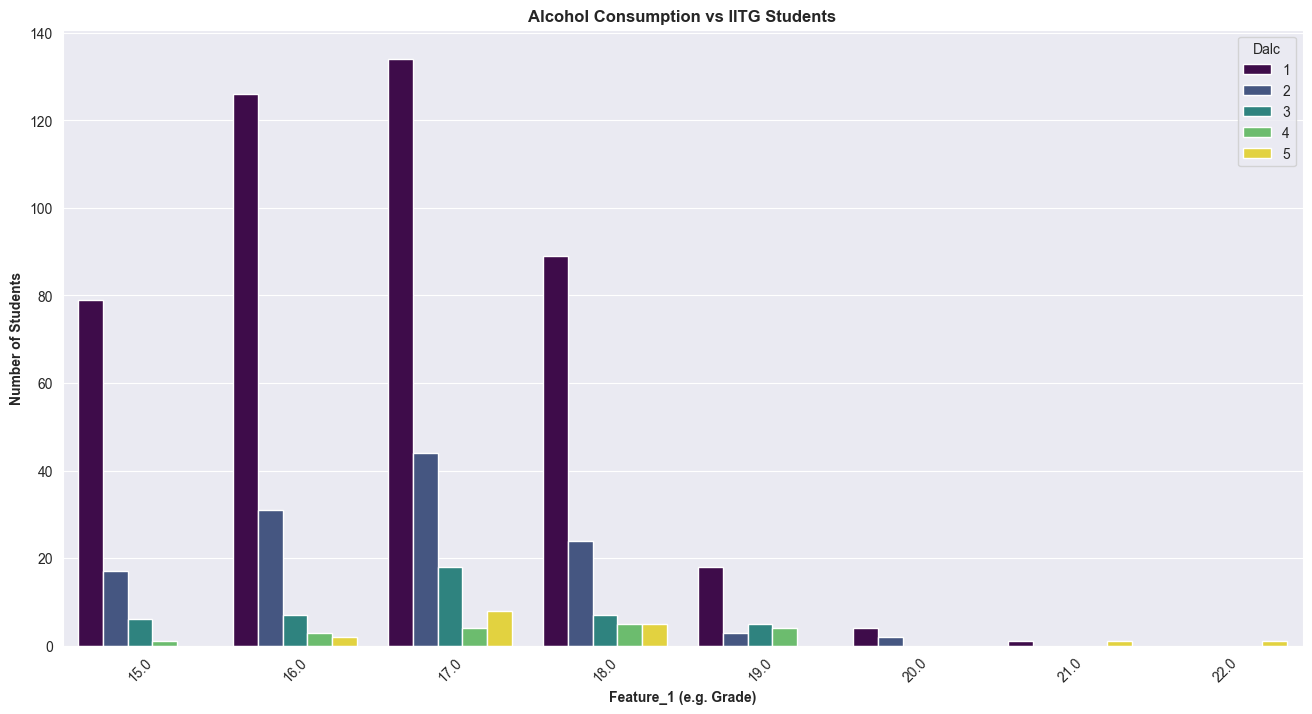

In [37]:
alco = df.groupby(['Feature_1', 'Dalc']).size().reset_index(name='Count')

plt.figure(figsize=(16, 8))
sns.barplot(data=alco, x='Feature_1', y='Count', hue='Dalc', palette='viridis')

plt.title('Alcohol Consumption vs IITG Students', fontweight='bold')
plt.xlabel('Feature_1 (e.g. Grade)', fontweight='bold')
plt.ylabel('Number of Students', fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [38]:
romantic_f1 = df.groupby(['Feature_1'])['romantic'].value_counts().reset_index()
romantic_f1

,Feature_1,romantic,count
0,15.0,no,78
1,15.0,yes,25
2,16.0,no,118
3,16.0,yes,51
4,17.0,no,124
5,17.0,yes,84
6,18.0,no,72
7,18.0,yes,58
8,19.0,no,16
9,19.0,yes,14


In [39]:
print(df.Feature_1.value_counts())

Feature_1
17.0    208
16.0    169
18.0    130
15.0    103
19.0     30
20.0      6
21.0      2
22.0      1
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_38332\3682433261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ab, x='Feature_1', y='Count', palette='viridis')


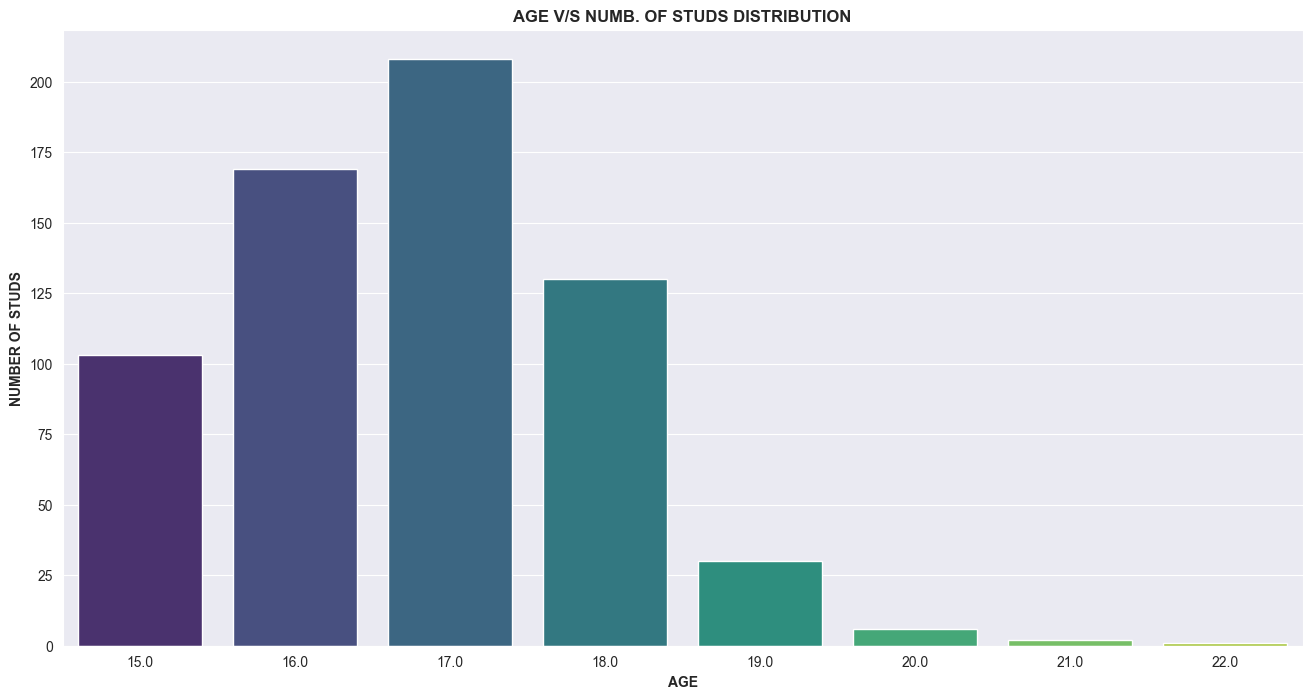

In [40]:
grp=df.groupby(['Feature_1'])['Feature_1'].value_counts().reset_index().sort_values(by='Feature_1', ascending=False)
grp
ab = df['Feature_1'].value_counts().sort_index().reset_index()
ab.columns = ['Feature_1', 'Count']
plt.figure(figsize=(16, 8))
sns.barplot(data=ab, x='Feature_1', y='Count', palette='viridis')
plt.title('AGE V/S NUMB. OF STUDS DISTRIBUTION',fontweight='bold')
plt.xlabel('AGE',fontweight='bold')
plt.ylabel('NUMBER OF STUDS',fontweight='bold')
plt.show()

In [41]:
school_f1 = df.groupby(['Feature_1'])['school'].value_counts().reset_index()
school_f1

,Feature_1,school,count
0,15.0,GP,79
1,15.0,MS,24
2,16.0,GP,105
3,16.0,MS,64
4,17.0,GP,140
5,17.0,MS,68
6,18.0,GP,76
7,18.0,MS,54
8,19.0,GP,16
9,19.0,MS,14


In [42]:
# So overall, we can note that feature 1 denotes age.
# 1). By value count we can see that maxi. no. of studs are from 16-19 grp which means it corresponds to the age group of the students which are present in college.
# 2). Also, from Dalc v/s Feature 1 dataset we can see that teenage students like 16/17 drink once every week.

In [43]:
print(df.Feature_2.value_counts())

Feature_2
2.0    325
1.0    204
3.0     88
4.0     32
Name: count, dtype: int64


In [44]:
romantic_f2 = df.groupby(['Feature_2'])['romantic'].value_counts().reset_index()
romantic_f2

,Feature_2,romantic,count
0,1.0,no,138
1,1.0,yes,66
2,2.0,no,203
3,2.0,yes,122
4,3.0,no,45
5,3.0,yes,43
6,4.0,no,24
7,4.0,yes,8


In [45]:
failure_f2 = df.groupby(['Feature_2'])['failures'].mean().reset_index()
failure_f2

,Feature_2,failures
0,1.0,0.333333
1,2.0,0.200000
2,3.0,0.102273
3,4.0,0.062500


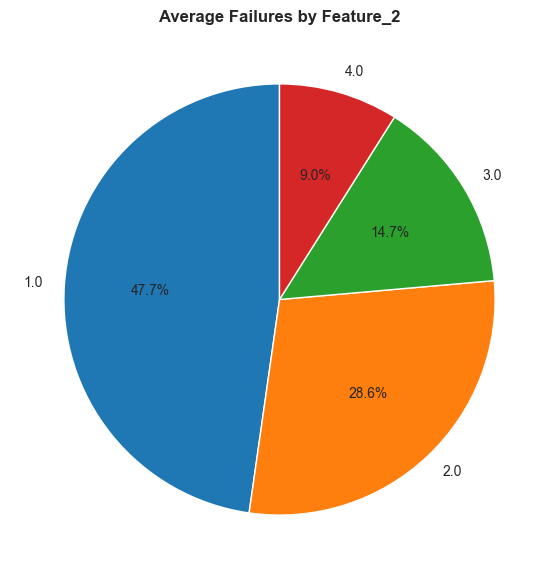

In [46]:

ales = df.groupby(['Feature_2'])[['failures']].mean().reset_index()

labels = ales['Feature_2']
values = ales['failures']

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Average Failures by Feature_2', fontweight='bold')
plt.show()


In [47]:
# So, it is clear from Feature_2 v/s failure data table that Feature_2 may represent no. of study hours of the student. The student who studies more is less likely to fail.

In [48]:
#Also, from the data we can identify that Feature_3 denotes the overall educational status of the student as per the no. of institutes he/she attended and also the participation in activities.

In [50]:
alc_gds = df.groupby(['Dalc'])['G3'].mean().reset_index()
alc_gds

,Dalc,G3
0,1,12.299335
1,2,11.363636
2,3,11.139535
3,4,8.941176
4,5,10.235294


In [52]:
famrel_gds = df.groupby(['famrel'])['G3'].mean().reset_index()
famrel_gds

,famrel,G3
0,1,10.636364
1,2,10.862069
2,3,11.594059
3,4,12.343849
4,5,11.633333


In [54]:
Mjob_Pstatus = df.groupby(['Mjob'])['Pstatus'].value_counts().reset_index()
Mjob_Pstatus

,Mjob,Pstatus,count
0,at_home,T,122
1,at_home,A,13
2,health,T,43
3,health,A,5
4,other,T,223
5,other,A,35
6,services,T,116
7,services,A,20
8,teacher,T,65
9,teacher,A,7


In [55]:
activities_gds = df.groupby(['activities'])['G3'].mean().reset_index()
activities_gds

,activities,G3
0,no,11.718563
1,yes,12.104762


In [56]:
Dalc_romantic = df.groupby(['Dalc'])['romantic'].value_counts().reset_index()
Dalc_romantic

,Dalc,romantic,count
0,1,no,289
1,1,yes,162
2,2,no,75
3,2,yes,46
4,3,no,32
5,3,yes,11
6,4,yes,10
7,4,no,7
8,5,yes,10
9,5,no,7
